# Example notebook

This is a notebook with few examples on how to read, manipulate and display images

# Necessary imports

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import imageio

# Function to load the csv data as a pandas DataFrame

In [2]:
def build_DataFrame(path):
    with open(data_path) as f:
        lines = f.readlines()
    mice_dict = {}
    table = []
    times = []
    for l in lines[4:]:
        values = l.strip().split(',')
        time = eval(values.pop(0))
        times.append(time)
        values = [eval(v) if v!='' else -1 for v in values]
        table.append(values)
    table = np.array(table)
    for i, (mouse, body) in enumerate(zip(lines[1].strip().split(',')[1:],
                                          lines[2].strip().split(',')[1:])):
        if i%3==0:
            val = 'x'
        elif i%3==1:
            val = 'y'
        else:
            val = 'likelyhood'
        mice_dict[mouse, body, val] = table[:, i]
    return np.array(times), pd.DataFrame(mice_dict)

# Loading the data and extracting the mice, bodyparts and coordinates names

In [3]:
data_path = Path('../data/data-test.csv')
times, df = build_DataFrame(data_path)
mice = df.columns.levels[0]
bodyparts = df.columns.levels[1]
coordinates = df.columns.levels[2]
print('Available bodyparts:\n\t', ', '.join(bodyparts))
print('Available mice:\n\t', ', '.join(mice))

Available bodyparts:
	 bodycentre, leftEar, lefthindlimb, nose, rightEar, righthindlimb, tailbase, tailtip
Available mice:
	 mus1, mus2, mus3, mus4, mus5


# Plotting the x and y positions over time
Plotting the x and y positions of the right hind limb of the `mus3` over time with time point `tp=1500` highlighted

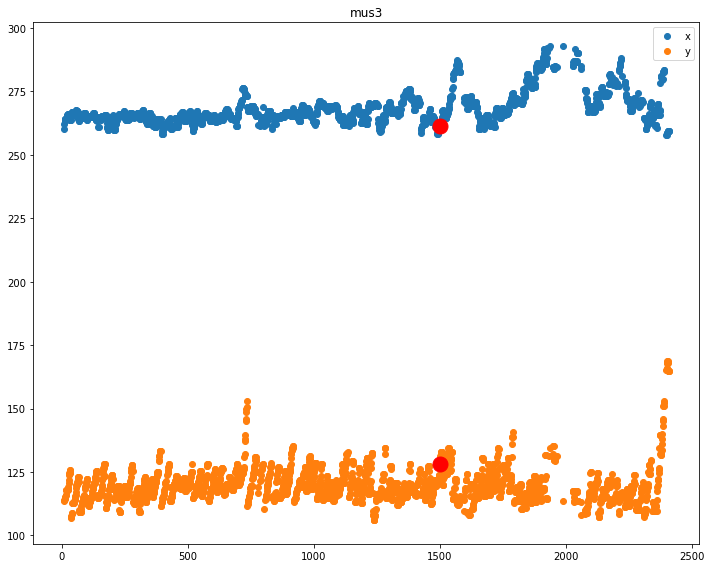

In [4]:
bp = 'righthindlimb'
mouse = 'mus3'
tp = 1500
fig, ax = plt.subplots(figsize=(10, 8))
x = df[mouse][bp]['x']
y = df[mouse][bp]['y']
l = df[mouse][bp]['likelyhood']
mask = .5<l
ax.plot(times[mask], x[mask], 'o', label='x')
ax.plot(times[mask], y[mask], 'o', label='y')
ax.plot([tp], x[tp], 'ro', ms=15)
ax.plot([tp], y[tp], 'ro', ms=15)
ax.set_title(mouse)
ax.legend()
fig.tight_layout()

# Plotting the x __vs__ y positions over time
Plotting the x __vs__ y positions of the right hind limb of the `mus3` over time with time point `tp=1500` highlighted

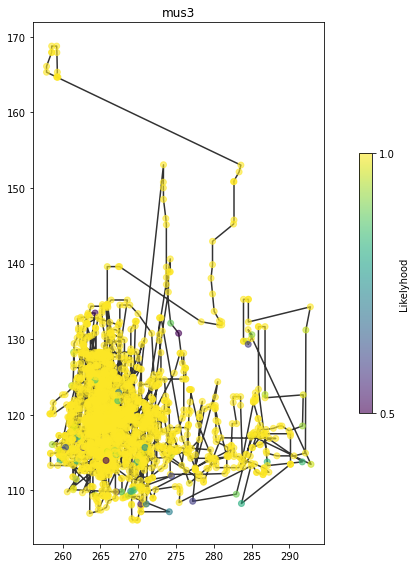

In [5]:
bp = 'righthindlimb'
mouse = 'mus3'
tp = 1500
fig, ax = plt.subplots(figsize=(10, 8))
x = df[mouse][bp]['x']
y = df[mouse][bp]['y']
l = df[mouse][bp]['likelyhood']
mask = .5<l
sc = ax.scatter(x[mask], y[mask], c=l[mask], cmap='viridis', alpha=.6, facecolor=None)
ax.plot(x[mask], y[mask], 'k-', zorder=0, alpha=.8)
fig.colorbar(sc, ax=ax, shrink=.5, label='Likelyhood', ticks=[min(l[mask]), 1],
             format='%.1f', drawedges=False)
ax.set_title(mouse)
ax.set_aspect('equal')
fig.tight_layout()

# Reading the video

In [6]:
vid = imageio.get_reader('../data/movie-test.mp4',  'ffmpeg')

# Plotting on the video
Plotting the x, y position of the right hind limb of `mus3` around time point `tp=1500`

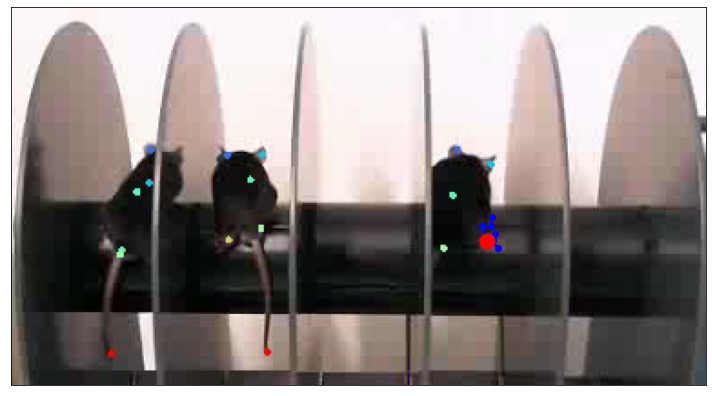

In [7]:
bp = 'righthindlimb'
mouse = 'mus3'
tp = 1500
step=10
fig, ax = plt.subplots(figsize=(10, 8))
x = df[mouse][bp]['x']
y = df[mouse][bp]['y']
l = df[mouse][bp]['likelyhood']
ax.imshow(vid.get_data(tp), )
x_tp = x[tp-(3*step):tp+(4*step):step]
y_tp = y[tp-(3*step):tp+(4*step):step]
ax.plot(x_tp, y_tp, 'bo-', lw=2)
ax.plot(x[tp], y[tp], 'ro', ms=15)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
fig.tight_layout()